# Table of Contents
 <p><div class="lev1"><a href="#Anatomy"><span class="toc-item-num">1&nbsp;&nbsp;</span>Anatomy</a></div><div class="lev1"><a href="#Imaging"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imaging</a></div><div class="lev2"><a href="#Infinity-space"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Infinity space</a></div><div class="lev1"><a href="#Strains-and-genetics"><span class="toc-item-num">3&nbsp;&nbsp;</span>Strains and genetics</a></div><div class="lev1"><a href="#Aquisition-protocol"><span class="toc-item-num">4&nbsp;&nbsp;</span>Aquisition protocol</a></div><div class="lev3"><a href="#software-setup"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>software setup</a></div><div class="lev3"><a href="#Finding-the-steering-muscles"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Finding the steering muscles</a></div><div class="lev3"><a href="#Data-aquisition"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Data aquisition</a></div><div class="lev1"><a href="#Basic-image-processing"><span class="toc-item-num">5&nbsp;&nbsp;</span>Basic image processing</a></div><div class="lev2"><a href="#Grabbing-ROI's-using-ImageJ"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Grabbing ROI's using ImageJ</a></div><div class="lev2"><a href="#Components-based-projections"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Components based projections</a></div><div class="lev2"><a href="#Dimensionality-reduction-using-regression"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Dimensionality reduction using regression</a></div><div class="lev1"><a href="#Image-registration"><span class="toc-item-num">6&nbsp;&nbsp;</span>Image registration</a></div>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png' #svg
import matplotlib.pyplot as plt # this notebook is for plotting
#import pylab as plt
import numpy as np
import scipy as sp
import figurefirst as fifi
from IPython.display import display,SVG

# Anatomy

The insect exoskeleton is essentially a continuous sheet consisting of hardened plates known as sclerites separated by more flexible regions that allow movement. Muscles attach directly to theses sclerites, or to tendinous internal folds of cuticle known as apodmes. 

The thorax of the true flies (diptera) consists of three fused segments which called (in order from anterior to posterior) the prothorax, the mesothorax and the metahorax. The wings belong to the mesothorax which is greatly expanded with respect to the prothorax and metathorax; however the major subdivisions of each segment is more or lest repeated serially if you look hard enough. Dorsal-ventrally the segments are subdivided into the Notum,Pleuron and Sternum. The muscle fibers of most of the direct flight muscles can be found lying directly under the major sclerites of the Pleuron however they  project and attach to a small set of sclerites within the wing. Curiously, the halteres -- which are modified hind wings of the metathorax -- have their own set of direct muscles.

**Fig 1.1 Schematic of thoracic layout.**

<img src="static/Thorasic_anatomy.svg"style="width:400px;float:left;"> 

**Fig 1.2 Image of thorax with major sclerites labeled.**

<img src="static/thorax.jpg"style="width:400px;float:left;"> 

**Fig 1.3 Location of the major steering muscle muscle bodies.**

<img src="static/muscle_map_layers.svg"style="width:400px;float:left;"> 

# Imaging

## Infinity space 

We are using a fairly simple wide-field epi-fluorescent microscope for imaging. The system is the same as a typical upright microscopes you are probably familiar with, with the exception that we have not included an optical pathway for eyepieces, nor have we included any mechanical device to facilitate exchange of the objectives (usually known as the nosepiece). Fundamentally, an infinity microscope is based on a system of two lenses: (1) The Objective lens, so named because it collects light from the object of interest. (2) The tube lens which is responsible for focusing the light onto the camera sensor.

The range of angles that the objective lens can accept from the sample ultimately sets the upper bound on the microscope's resolving power. This range is specified by the numerical aperture or (NA) of the objective. In an infinity corrected system all rays from a point source of the object are focused into parallel rays of light by the objective lens, though light from different points in space are focused at different angles. Note that for the thin lens approximation of the microscope shown in figure 4 this means that specimen should be located at the focal plane of the lens. In practice, the distance between the front lens of a microscope objective and the specimen need not be the same as the objective focal length, instead this distance is usually specified by the working distance (WD). A key thing to realize here is that the objective lens is doing its work by converting spatial coordinates into angular coordinates. When you buy a microscope objective the effective focal length is sometimes listed, since this value specifies the transformation from space to angles. In the case that this value is not listed - as you will see below- it is easy to work out the effective focal length from the objective magnification, so long as you know the focal length of tube lens that the objective was built for.

The tube lens essentially works like the objective lens but in reverse; taking the parallel rays from the objective lens and converting the angles back into spatial coordinates on the imaging sensor. As with the objective lens, the mapping between angles to space is a function of the tube lens focal length. 

As an exercise use a ray diagram to show that the microscope's magnification is the ratio of the focal length of the tube lens over the focal length of the objective lens.

**Fig 2.2 infinity telescope**

<img src="static/basic_infinity_space.svg"style="width:400px;float:left;"> 

# Strains and genetics

To image calcium activity in the steering muscles we are using GAL-4/UAS system to express the genetically encoded indicator GcAMP6f in the steering muscles. The GAL-4 'driver-line' determines what tissue is targeted, whereas the UAS 'responder line' determines what transgenic protein we will express. The genotypes of the lines I brought are: 

GRM22H05 expresses in the muscles: b1,b2,b3,i1,i2, iii1,iii24, iii3, hg1,hg2,hg3,hg4 as well as a number of neck abdominal and leg muscles that I have not charactarized. GMR39E01 expresses in a similar set of flight muscles, with the exception of i1 and i2.

# Aquisition protocol

### software setup
- Make sure Axoscope,Micromanager, and Matlab are open.
- Design the experiment to determine how long your protocol will run (I recommend somewhere from 10-20min to ensure that the file sizes are manigeble)
- Setup micromanager 
        -8X8 binning
        -21ms exposure time
        -adjust gain: ...

### Finding the steering muscles
- Start micromanager in live mode. 
- place a tethered fly in front of the microscope.  
- Position the fly so that you can see the blue light shining on the surface of the cuticle.
- Make sure the fly is flying (it will be difficult to see the muscles during quiescence)
- Focus on the b3 muscle (as best as possible).
- You shouldn't need to adjust the hutchens much or at all - the position of the fly is fixed by the microscope - if the hutchens don't look good it's probably not a fixable problem. 

### Data aquisition
- The camera outputs an exposure signal that we record simultaneously with signals from the arena controller and wingbeat analyzer. We will need to use the exposure signal to synchronize the images with the other data. It's also important that we record the first and last frame coming from the camera so we have a frame of reference. For this reason I usually start acquiring in the following order:

(1) Axoscope 
(2) Multidimensional acquisition in micromanager
(3) Run the experiment protocol in matlab


# Basic image processing

## Grabbing ROI's using ImageJ

For the recordings from the fly steering muscles, we will take the data from the camera and save it as a stack of tiff images, where each image is a 128 X 128 array of 8 bit unsigned integers with values ranging from 0,255. Note that though we may be used to thinking about an image as a matrix, it is also reasonable to consider each of these images as the 16384-dimensional vector created by unraveling the matrix. The most natural representation will depend on the type of processing we wish to perform. 

Typically when using imaging techniques to study neurophysiology, we will probably want to somehow reduce the dimensionality of each image in order to make sense of the data. Perhaps this is so that we have a manageable dataset, but often times the goal is to project the data into a more biologically relevant frame - we are not really interested in how the intensity of the pixels fluctuate over time, but rather the changes in the fluorescence of some cells. 

The simplest method for performing this analysis is to use regions of interest (ROI's): We identify a collection of pixels that fall within a region of the image that we think corresponds to the cells we are interested in. We then summarize the intensity of the those pixels with a simple statistic (mean, median ect..). 


## Components based projections
This ROI approach works quite well when the cells we wish to record from are well separated from one another on the image, but sometimes biology is not so convenient, and the cells we wish to record from overlap in the imaging frame. This is the case for the muscle bodies of the steering muscles, but you might also have this problem using two photon imaging from dense neuropil or nuclei where the axons and dendrites of different cells cannot be entirely resolved.

There are a number of approaches for disentangling the signals from overlapping biological entities, but they all more or less involve viewing the image as some linear combination of overlapping parts known as components, although the methods for defining these components differ depending on the approach. Techniques such as Principle Components Analysis (PCA) or Independent Components Analysis (ICA) are considered blind techniques since the components are determined using by examining the statistics of how pixels intensity changes over time. For the steering muscles of the thorax we are in a somewhat fortunate situation that we understand the anatomy fairly well and, the anatomy is fairly stereotyped from fly-to-fly. For this reason we have the opportunity to define the components more explicitly from our knowledge of the anatomy.

To provide a simple example of how we might do this, consider a very low resolution image, $\mathbf{y}$, that is composed of only two pixels. Pretend that we know that within the field of view of this image there is a large cell that fills both pixels. We also know that there is a small, 1 pixel-wide cell sitting in the second pixel over. Now if we knew the fluorescence intensity of each of these cells we would predict the intensity of the final image to be the sum of these two distinct components. Say the large cell is active at an intensity $\beta_{1}$, and  the small cell is active at a value of $\beta_{2}$, then the final distribution of pixel intensities would be: $\mathbf{y} = \begin{bmatrix}\beta_{1}&\beta_{1}+\beta_{2}\end{bmatrix}$

**figure 5.1 photons from two cells summing on a small sensor**

<img src="static/two_pix.svg"style="width:400px;float:left;"> 


Of course, we are really interested in the inverse problem; our goal is to determine $\beta_{1}$ and $\beta_{2}$ from the image, $\mathbf{y}$, a fairly easy problem in this case. We get $\beta_{1}$, from the value of $y_{1}$, and we can get $\beta_{2}$ by subtracting  $\beta_{1}$ from $y_{2}$.

A more general way of solving for $\beta_{1}$ and $\beta_{2}$ however is by writing the matrix equation:

$\begin{bmatrix}\mathbf{x_{1}} & \mathbf{x_{2}}\end{bmatrix}\boldsymbol{\beta} = \mathbf{y}$ where $\mathbf{x_{1}}$,$\mathbf{x_{2}}$ are respectively, the column vectors $\begin{bmatrix} 1 \\ 1 \end{bmatrix}$ and $\begin{bmatrix} 0 \\ 1\end{bmatrix}$, that tell us the spatial distribution of cell 1 and cell 2 and $\boldsymbol{\beta}$ is a column vector of unknown coefficients $\begin{bmatrix}\beta_{1} \\ \beta_{2}\end{bmatrix}$. Using this relation we can then just solve for the betas with: $\boldsymbol{\beta} = \begin{bmatrix}\mathbf{x_{1}} & \mathbf{x_{2}}\end{bmatrix}^{-1}\mathbf{y}$

In [152]:
np.vstack((x1,x2)).T

array([[1, 0],
       [1, 1]])

In [148]:
import numpy as np
b1,b2 = (3,8)
x1 = np.array([1,1])
x2 = np.array([0,1])
img = x1*b1 + x2*b2
xinv = np.linalg.inv(np.vstack((x1,x2)).T)
b1_,b2_ = np.dot(xinv,img)
print np.allclose((b1_,b2_),(b1,b2))

True


In [115]:
# Make Fig 5.1
layout = fifi.FigureLayout('static/two_pix_layout.svg',make_mplfigures = True)
#layout.axes['x1'].imshow([x1*b1],aspect = 'auto',interpolation = 'Nearest',cmap = plt.cm.gray,vmin = -1,vmax = 10)
layout.axes['x1'].pcolor([x1*b1],cmap = plt.cm.gray,vmin = -1,vmax = 12,edgecolors='w')
layout.axes['x2'].pcolor([x2*b2],cmap = plt.cm.gray,vmin = -1,vmax = 12,edgecolors='w')
layout.axes['img'].pcolor([img],cmap = plt.cm.gray,vmin = -1,vmax = 12,edgecolors='w')
[fifi.mpl_functions.kill_spines(ax) for ax in layout.axes.values()];plt.close()
layout.save('static/two_pix.svg',hidelayers = ['Layer 1'],targetlayer = 'mpltarget')
#layout.save('static/two_pix.svg',targetlayer = 'mpltarget')
#display(SVG('static/components.svg'))

encoding error


## Dimensionality reduction using regression
Of course in the above example we have set things up here so that the there is a single, unique solution to our linear system since the matrix $X = \begin{bmatrix}\mathbf{x_{1}} & \mathbf{x_{2}}\end{bmatrix}$ (sometimes called the design matrix) is square and invertible. In practice, this is not often (probably never) going to be the case. We will have many more pixels than components (the system is overdetermined), and our image will be contaminated by some noise (making the system inconsistent). 

To solve the problem when we have a non-square $X$  and inconsistent data, we can use the generalized inverse, or pseudo-inverse to find the least-squares solution. 

To consider a more realistic example, lets pretend we now have a 6x6 pixel sensor. Again, we have two cells, but now cell 1 fills a 2x2 pixel area in the top left of the sensor, and cell 2 is where it was before -- one pixel over in the top row. 

**Fig 5.2 two-component 3x3 image**

<img src="static/components.svg"style="width:400px;float:left;"> 


To solve this problem we unravel the image and components to treat them as vectors and then find the betas using: $\boldsymbol{\beta} = X^{+}\mathbf{y}$ where $X^+$ is the pseudoinverse of $X$.

It is worth realizing here, that if the components of $X$ don't overlap, this approach will simply return the average pixel intensity within each of the components - equivalant to using ROI's. Additionally, there is no reason why the elements of the design matrix need to be binary. Since X essentially constitutes a model of how we believe fluorescence from the underlying biological entities contribute to photons detected on our imaging sensor, we can use fractional values in X to account for blur from out of focus light if we choose. The extraction routene in used by the planotaxis program uses a model constructed by blurring high resolution confocal sections to approximate the view through our wide-field objective.

Questions:

How sensitive are the results to noise? How do the results depend on the size of the components? How about the amount of overlap?

In [122]:
import numpy as np
b1,b2 = (3.,8.)
print 'true activations:%.2f,%.2f'%(b1,b2)
x1 = np.array([[1,1,0],[1,1,0],[0,0,0]]) # cell 1
x2 = np.array([[0,1,0],[0,0,0],[0,0,0]]) # cell 2
img = x1*b1 + x2*b2
noise = (np.random.rand(3,3)-0.5)*3
img += noise
xinv = np.linalg.pinv(np.vstack((x1.ravel(),x2.ravel())).T)
b1_,b2_ = np.dot(xinv,img.ravel())
print 'estimated activations:%.2f,%.2f'%(b1_,b2_)

true activations:3.00,8.00
estimated activations:3.27,7.92


encoding error


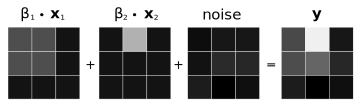

In [133]:
# Make Fig 5.1
layout = fifi.FigureLayout('static/components_layout.svg',make_mplfigures = True)
for axlbl,dta in zip(('x1','x2','noise','img'),(x1*b1,x2*b2,noise,img)):
    layout.axes[axlbl].pcolor(dta[::-1,:],cmap = plt.cm.gray,vmin = -1,vmax = 12,edgecolors='w')
[fifi.mpl_functions.kill_spines(ax) for ax in layout.axes.values()];plt.close()
layout.save('static/components.svg',hidelayers = ['Layer 1'])
display(SVG('static/components.svg'))

# Image registration

The stereotyped anatomy of the fly thorax allows us to take advantage of prior-constructed components for the steering muscles, however, there will be some variation in anatomy from fly-to-fly. Additionally, it would be fairly difficult to orient the fly exactly the same way from one experiment to the next. To deal with this, we will need to register our model, X, with the images collected on the sensor. I've found that using a three point (affine) registration does a pretty good job, and is simple enough so that it is possible to apply the fits by eye. 

There is no need to go into the details of affine transformations since there is plenty of material available online. What is important is that we need to identify three corresponding points on both the model and the calcium images.  As a happy circumstance, the patterning of the large hairs on the surface of the fly and the patterning of the muscles are driven by deeply intertwined developmental programs. So I ended up using three of these large hairs (arrows in figure 1.3) to form the reference frame. In practice, you will probably find the best fits by using these fiduciaries as initial markers, and then using the layout of the musculature to refine the fit.